# 🍷 Wine Dataset EDA - 30-Minute Exercise

This notebook walks through a structured 30-minute exploratory data analysis of the `wine` dataset from `sklearn`.

## 📋 Objectives
- Load and inspect the data
- Perform univariate analysis
- Visualize class distributions and correlations
- Comment on findings relevant to ML modeling

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.utils import Bunch
from typing import cast

# 🔧 Configure plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1️⃣ Data Loading & Initial Inspection

In [2]:
# Load the wine dataset
# Note: This cell depends on imports from the first cell
from sklearn.utils import Bunch
from typing import cast

# Load dataset with explicit type casting
wine_dataset = cast(Bunch, load_wine())

# Verify the dataset loaded correctly
if not hasattr(wine_dataset, 'data') or not hasattr(wine_dataset, 'target'):
    raise ValueError("Failed to load wine dataset properly")

# Create DataFrame with explicit type handling
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
df['target'] = wine_dataset.target

print("Dataset shape:", df.shape)
print("\nTarget classes:", wine_dataset.target_names)
print("\nFirst few rows:")
df.head()

Dataset shape: (178, 14)

Target classes: ['class_0' 'class_1' 'class_2']

First few rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Basic info about the dataset
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("Missing values:")
print(df.isnull().sum().sum())

print("\n" + "="*50)
print("Target distribution:")
print(df['target'].value_counts().sort_index())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    floa

## 2️⃣ Univariate Analysis

In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


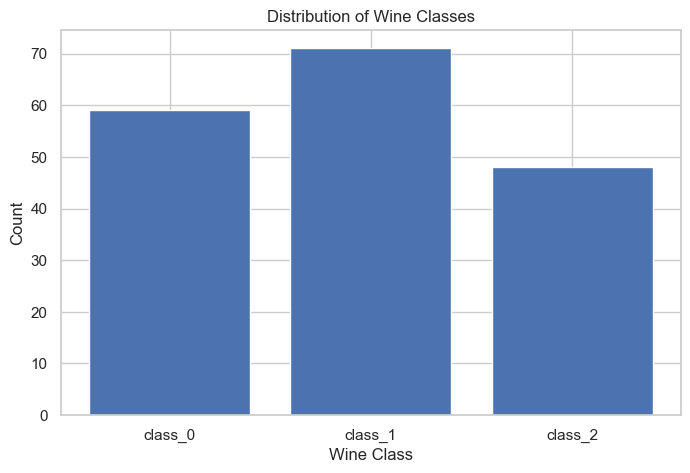

Class distribution:
class_0: 59 samples (33.1%)
class_1: 71 samples (39.9%)
class_2: 48 samples (27.0%)


In [5]:
# Distribution of target classes
plt.figure(figsize=(8, 5))
target_counts = df['target'].value_counts().sort_index()

# Convert to numpy arrays for matplotlib compatibility
bar_positions = np.arange(len(target_counts))
bar_heights = np.array(target_counts.values)

plt.bar(bar_positions, bar_heights)
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Distribution of Wine Classes')
plt.xticks(bar_positions, wine_dataset.target_names)
plt.show()

print("Class distribution:")
for i, name in enumerate(wine_dataset.target_names):
    count = target_counts[i]
    percentage = (count / len(df)) * 100
    print(f"{name}: {count} samples ({percentage:.1f}%)")

## 3️⃣ Feature Distributions

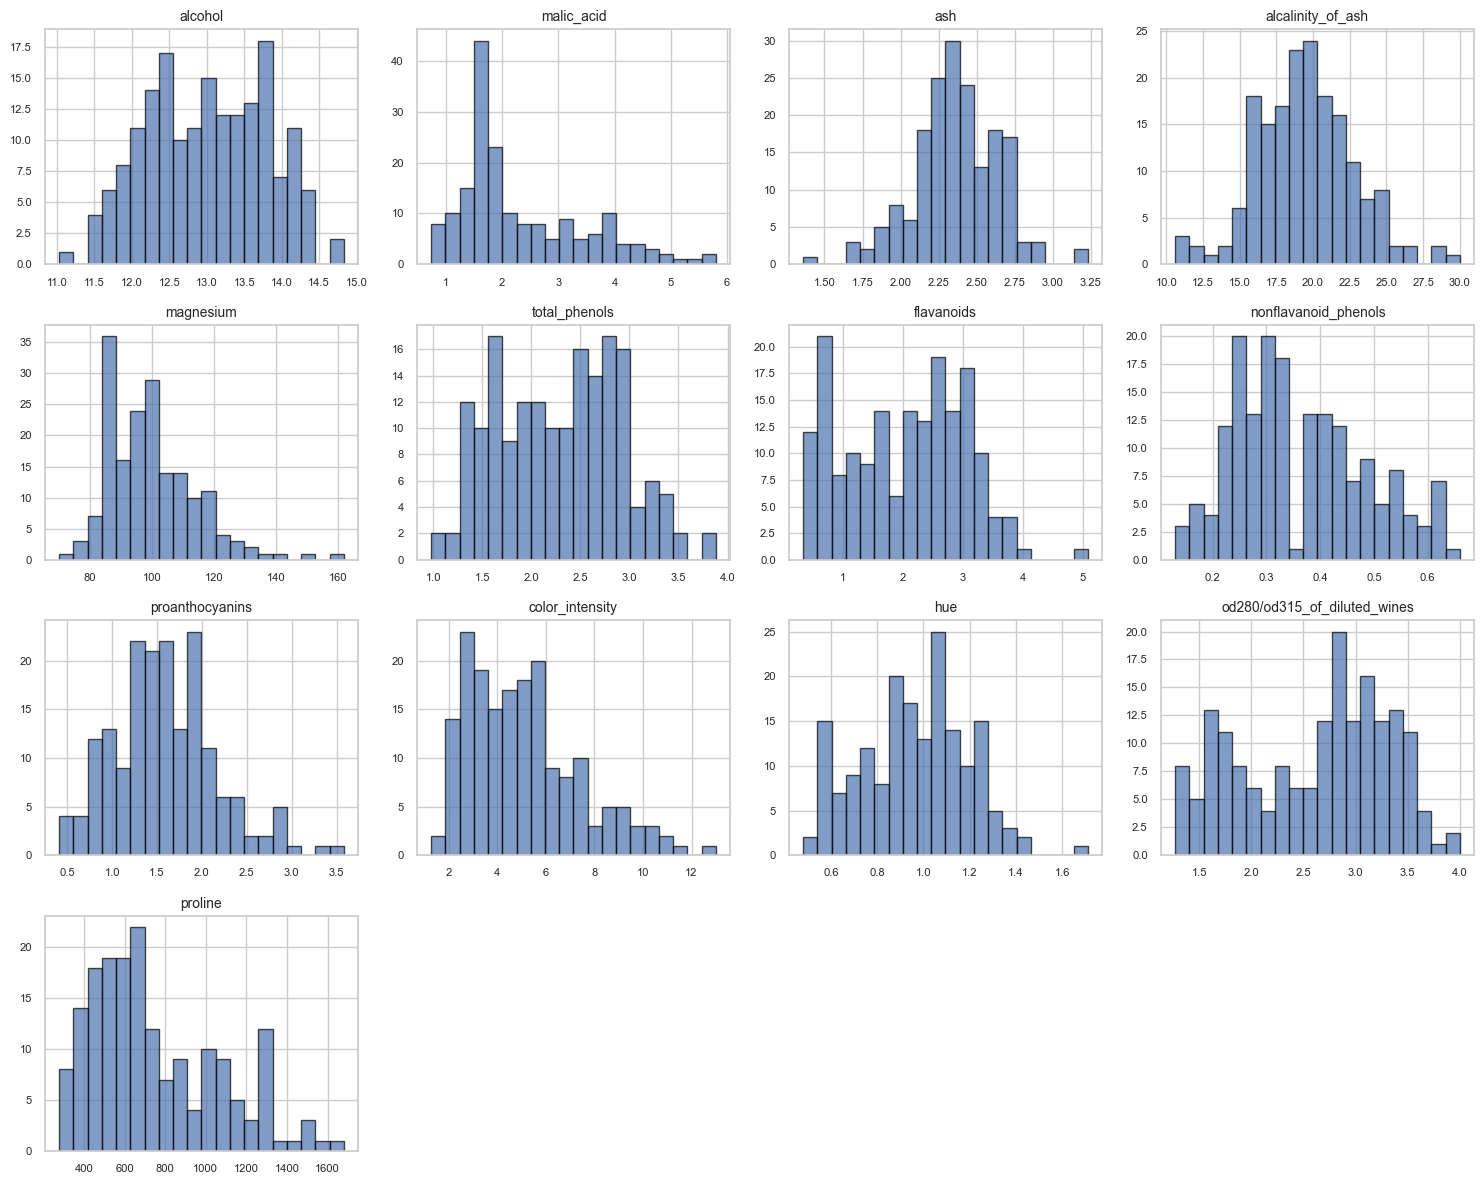

In [6]:
# Plot histograms for all features
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']

for i, col in enumerate(feature_cols[:16]):
    axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(labelsize=8)

# Hide extra subplots if we have fewer than 16 features
for i in range(len(feature_cols), 16):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 4️⃣ Correlation Analysis

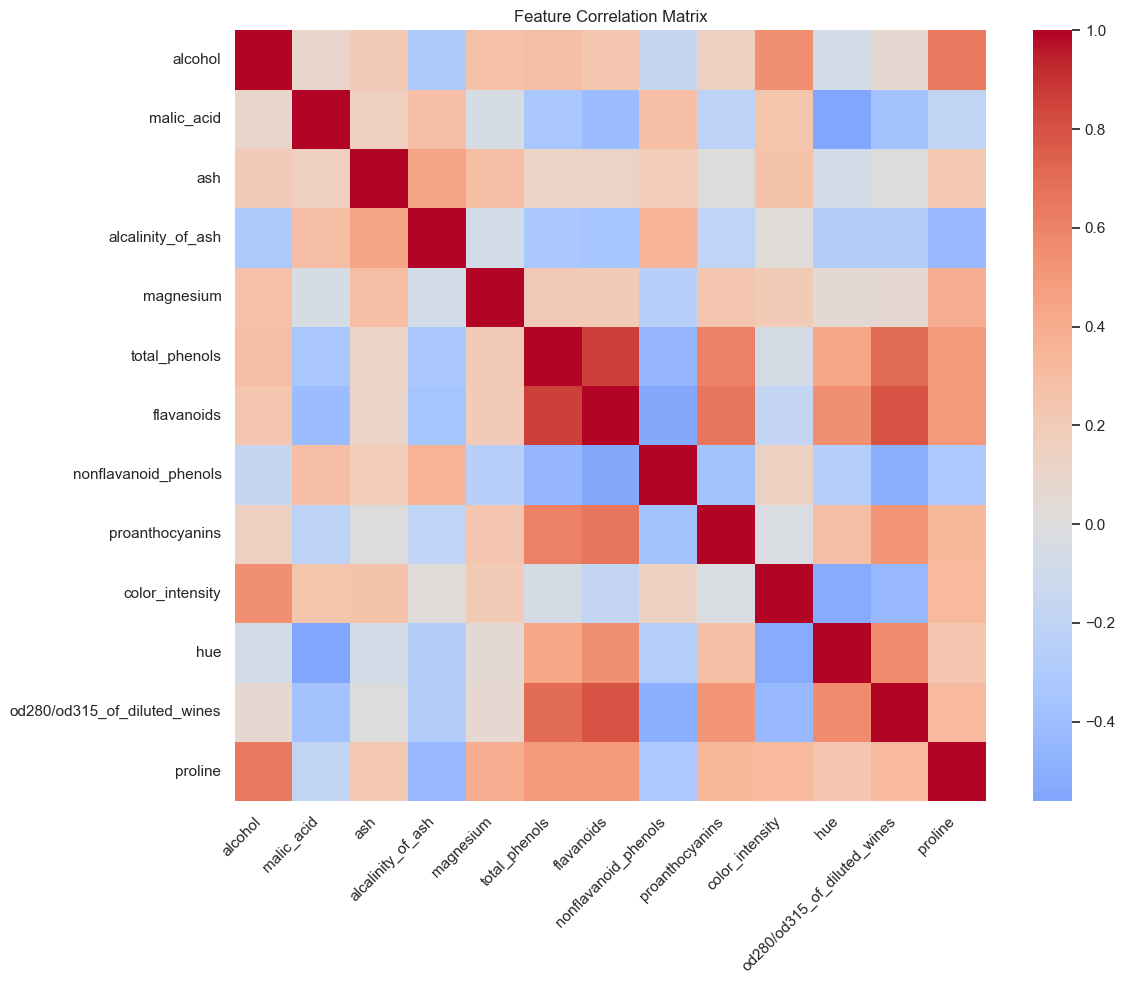

Highly correlated feature pairs (|correlation| > 0.8):
total_phenols <-> flavanoids: 0.865


In [7]:
# Correlation matrix (excluding target)
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find highly correlated pairs
print("Highly correlated feature pairs (|correlation| > 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Get correlation value and convert to Python float
        corr_val = correlation_matrix.iloc[i, j]
        try:
            # Simple conversion that works for all numeric types
            corr_numeric = corr_val if isinstance(corr_val, (int, float)) else float(str(corr_val))
            if not pd.isna(corr_numeric) and abs(corr_numeric) > 0.8:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       corr_numeric))
        except (ValueError, TypeError):
            continue

for pair in high_corr_pairs:
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

## 5️⃣ Class-wise Analysis

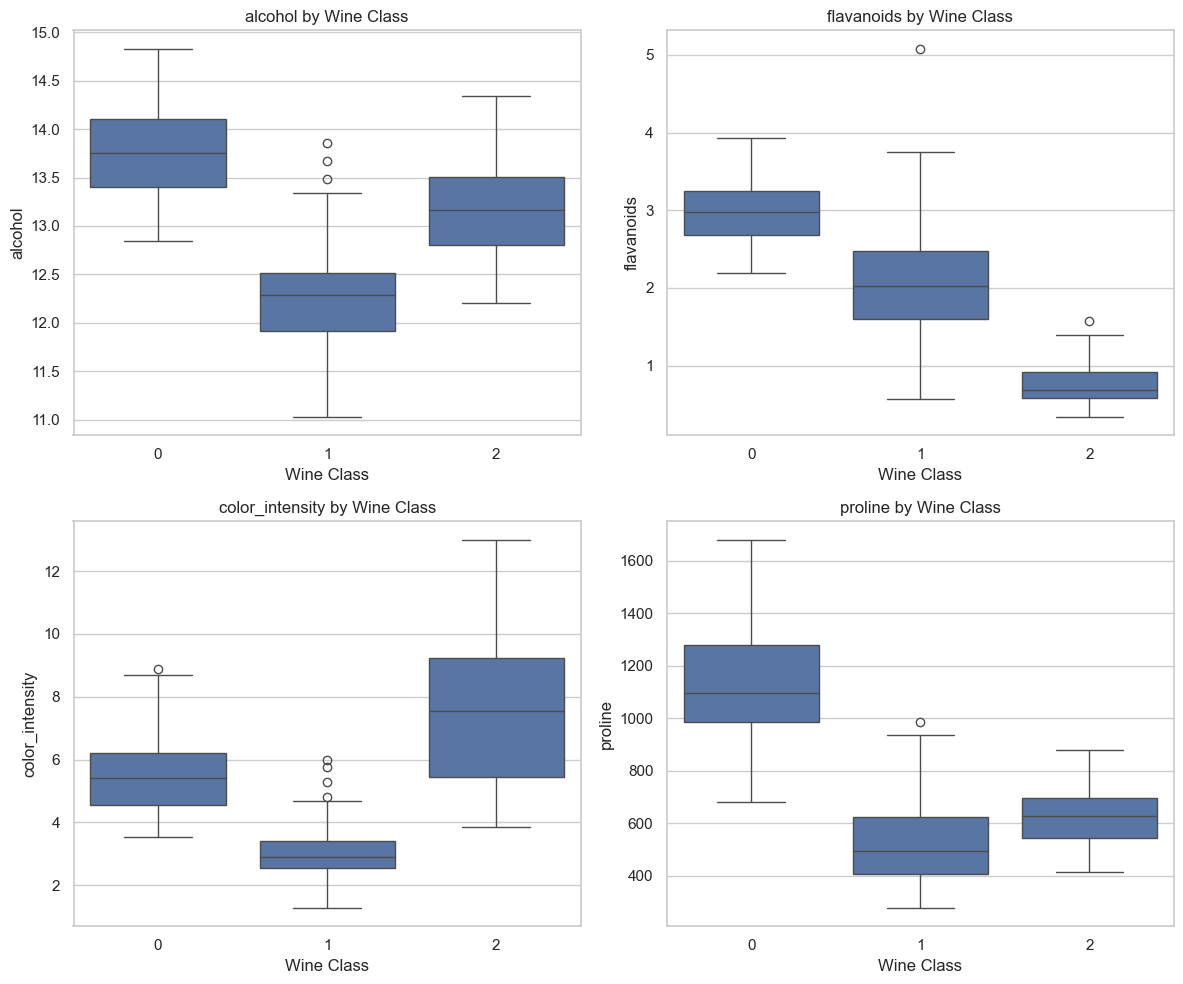

In [8]:
# Box plots for key features by wine class
key_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df, x='target', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Wine Class')
    axes[i].set_xlabel('Wine Class')

plt.tight_layout()
plt.show()

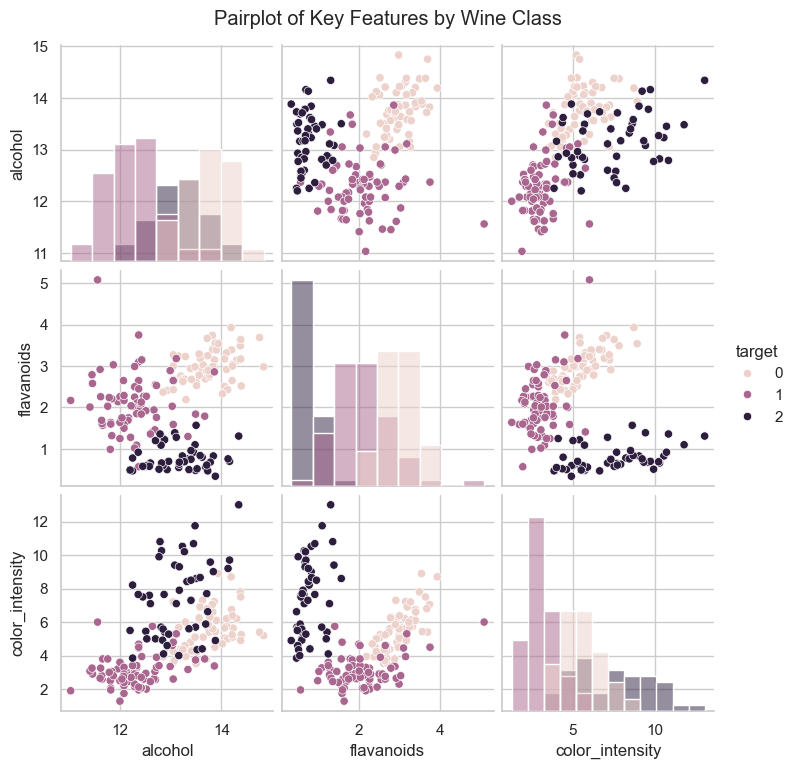

In [9]:
# Pairplot for selected features
selected_features = ['alcohol', 'flavanoids', 'color_intensity', 'target']
sns.pairplot(df[selected_features], hue='target', diag_kind='hist')
plt.suptitle('Pairplot of Key Features by Wine Class', y=1.02)
plt.show()

## 6️⃣ Summary & ML Modeling Insights

Features most correlated with target (absolute correlation):
flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
dtype: float64


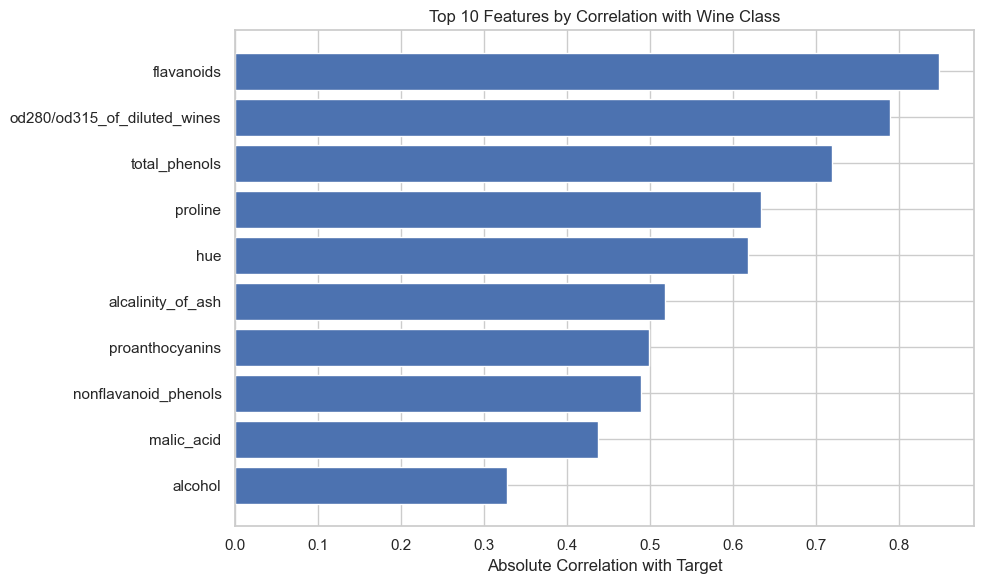

In [10]:
# Feature importance analysis using correlation with target
feature_target_corr = df.drop('target', axis=1).corrwith(df['target']).abs().sort_values(ascending=False)

print("Features most correlated with target (absolute correlation):")
print(feature_target_corr.head(10))

# Visualize top correlated features
plt.figure(figsize=(10, 6))
top_features = feature_target_corr.head(10)

# Convert to numpy arrays for matplotlib compatibility
bar_positions = np.arange(len(top_features))
bar_values = np.array(top_features.values)
bar_labels = [str(label) for label in top_features.index]

plt.barh(bar_positions, bar_values)
plt.yticks(bar_positions, bar_labels)
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 10 Features by Correlation with Wine Class')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 📝 Key Findings & ML Modeling Recommendations

**Dataset Characteristics:**
- 178 samples, 13 features, 3 wine classes
- No missing values - clean dataset
- Slightly imbalanced classes but not severely

**Feature Insights:**
- Several features show strong correlations (potential multicollinearity)
- Features like flavanoids, proline, and alcohol show good class separation
- Some features have skewed distributions

**ML Modeling Recommendations:**
1. **Feature Selection**: Consider removing highly correlated features
2. **Scaling**: Features have different scales - normalization recommended
3. **Class Balance**: Classes are reasonably balanced, no special handling needed
4. **Model Choice**: Given clear class separation, tree-based models or SVM should work well
5. **Cross-validation**: Small dataset - use stratified k-fold CV

**Next Steps:**
- Feature scaling/normalization
- Feature selection (remove highly correlated features)
- Try multiple algorithms (Random Forest, SVM, Logistic Regression)
- Hyperparameter tuning with cross-validation